In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("MS-Dhoni-Kreedon.webp")

In [4]:
img.shape

(720, 1280, 3)

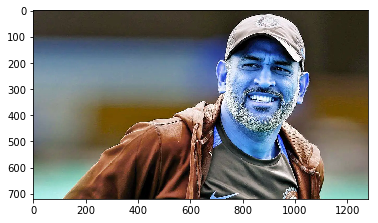

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(720, 1280)

In [7]:
gray

array([[ 57,  57,  57, ...,  33,  33,  33],
       [ 57,  57,  57, ...,  33,  33,  33],
       [ 57,  57,  57, ...,  33,  33,  33],
       ...,
       [230, 230, 230, ..., 198, 198, 198],
       [230, 230, 230, ..., 199, 199, 199],
       [230, 230, 230, ..., 199, 199, 199]], dtype=uint8)

In [8]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[716,  79, 341, 341]])

In [8]:
(x,y,w,h) = faces[0]

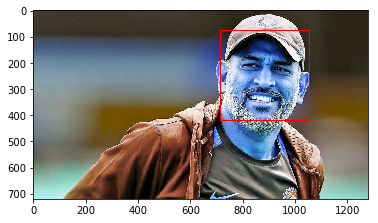

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

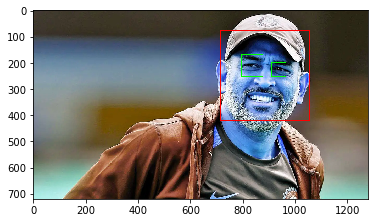

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

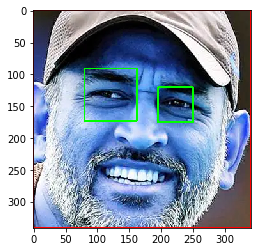

In [11]:
plt.imshow(roi_color,cmap='gray')

In [9]:
 def get_cropped_image_if_2_eye(image_path):
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3,5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h,x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >=2:
                return roi_color

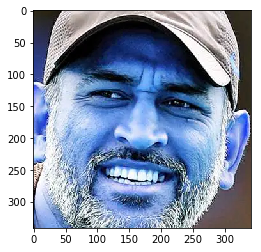

In [10]:
cropped_image = get_cropped_image_if_2_eye("MS-Dhoni-Kreedon.webp")
plt.imshow(cropped_image)

In [14]:
path_to_data = './dataset'
path_to_cr_data = './dataset/cropped/'

In [15]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [16]:
img_dirs

['./dataset\\cropped',
 './dataset\\lionel_messi',
 './dataset\\maria_sharapova',
 './dataset\\roger_federer',
 './dataset\\serena_williams',
 './dataset\\virat_kohli']

In [17]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [18]:
cropped_image_dirs = []
celebrity_file_names_dict = {} 


for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eye(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Folder created:", cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count +=1
                
            

cropped
lionel_messi
Folder created: ./dataset/cropped/lionel_messi
maria_sharapova
Folder created: ./dataset/cropped/maria_sharapova
roger_federer
Folder created: ./dataset/cropped/roger_federer
serena_williams
Folder created: ./dataset/cropped/serena_williams
virat_kohli
Folder created: ./dataset/cropped/virat_kohli


In [19]:
import numpy as np
import pywt
import cv2 

def w2d(img, mode='haar', level=1):
    imArray = img
    
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    
    imArray = np.float32(imArray)
    imArray /= 255 
    
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H


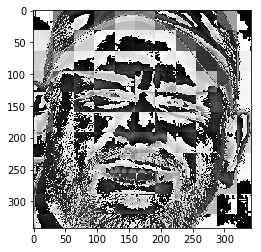

In [20]:

im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [21]:
celebrity_file_names_dict

{'cropped': [],
 'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_m

In [22]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
    
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [23]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [24]:
len(X)

166

In [25]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(166, 4096)

In [26]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ("svc", SVC(kernel = 'rbf', C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8809523809523809

In [29]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.71      0.83         7
           2       1.00      0.78      0.88         9
           3       0.57      1.00      0.73         4
           4       0.78      1.00      0.88         7
           5       1.00      0.93      0.97        15

    accuracy                           0.88        42
   macro avg       0.87      0.89      0.86        42
weighted avg       0.92      0.88      0.89        42



In [31]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [36]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' :{
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [37]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv = 5, return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
        'model':algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.839000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.732333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.847000,{'logisticregression__C': 1}


In [38]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [40]:
best_estimators['svm'].score(X_test,y_test)

0.8571428571428571

In [41]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8333333333333334

In [42]:
best_clf = best_estimators['svm']

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 5,  1,  0,  1,  0],
       [ 0,  8,  0,  1,  0],
       [ 0,  2,  2,  0,  0],
       [ 0,  0,  0,  7,  0],
       [ 0,  0,  1,  0, 14]], dtype=int64)

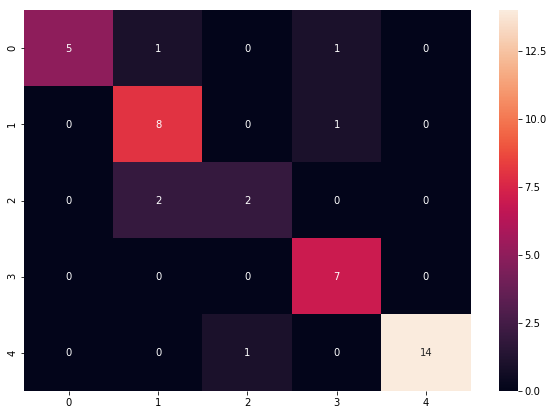

In [44]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

In [45]:
import joblib

In [46]:
joblib.dump(best_clf,"saved_model.pkl")

['saved_model.pkl']

In [49]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))